In [32]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
job = pd.read_csv("C://Users//Purva//Desktop//DS Final projects//6. Analyzing online Job Postings//data job posts.csv")

In [5]:
job.head(2)

jobpost         date  \
0  AMERIA Investment Consulting Company\nJOB TITL...  Jan 5, 2004   
1  International Research & Exchanges Board (IREX...  Jan 7, 2004   

                                               Title  \
0                            Chief Financial Officer   
1  Full-time Community Connections Intern (paid i...   

                                           Company AnnouncementCode Term  \
0             AMERIA Investment Consulting Company              NaN  NaN   
1  International Research & Exchanges Board (IREX)              NaN  NaN   

  Eligibility Audience StartDate  Duration  ... Salary  \
0         NaN      NaN       NaN       NaN  ...    NaN   
1         NaN      NaN       NaN  3 months  ...    NaN   

                                        ApplicationP OpeningDate  \
0  To apply for this position, please submit a\nc...         NaN   
1  Please submit a cover letter and resume to:\nI...         NaN   

          Deadline Notes                                             AboutC  \
0  26 January 2004   NaN                                                NaN   
1  12 January 2004   NaN  The International Research & Exchanges Board (...   

  Attach  Year Month     IT  
0    NaN  2004     1  False  
1    NaN  2004     1  False  

[2 rows x 24 columns]

In [6]:
job.describe().T    #numerical data

count         mean       std     min     25%     50%     75%     max
Year   19001.0  2010.274722  3.315609  2004.0  2008.0  2011.0  2013.0  2015.0
Month  19001.0     6.493869  3.405503     1.0     3.0     7.0     9.0    12.0

In [7]:
# categorical data set
job.describe(include='object').T

count unique  \
jobpost           19001  18892   
date              19001   4391   
Title             18973   8636   
Company           18994   4554   
AnnouncementCode   1208   1014   
Term               7676    411   
Eligibility        4930    663   
Audience            640    216   
StartDate          9675   1186   
Duration          10798   1515   
Location          18969    759   
JobDescription    15109  12861   
JobRequirment     16479  14182   
RequiredQual      18517  16688   
Salary             9622   2692   
ApplicationP      18941  14187   
OpeningDate       18295   3344   
Deadline          18936   5202   
Notes              2211   1031   
AboutC            12470   6016   
Attach             1559   1495   

                                                                top   freq  
jobpost           Career Center NGO\nTITLE:  English Language Co...     11  
date                                                    May 6, 2014     24  
Title                                                    Accountant    328  
Company                                               ArmenTel CJSC    353  
AnnouncementCode                                          IOS - 001      9  
Term                                                      Full time   5348  
Eligibility                                All qualified candidates   1223  
Audience                                  All interested candidates    105  
StartDate                                                      ASAP   4754  
Duration                                                  Long term   3458  
Location                                           Yerevan, Armenia  17061  
JobDescription    The incumbent will work under the direct super...     55  
JobRequirment     - Participate in application design;\n- Provid...     51  
RequiredQual      - Excellent communication skills;\n- Good oral...     43  
Salary                                                  Competitive   1298  
ApplicationP      To apply for this position, please open\nwww.c...     68  
OpeningDate                                            17 July 2009     25  
Deadline                                                       Open    103  
Notes             Should you have any questions regarding regist...    129  
AboutC            Mentor Graphics Development Services CJSC is a...    196  
Attach            The following attachment(s) to this announceme...     21

In [8]:
## Objective 1: Job Nature and Company Profiles
## The type of jobs that are in demand in Armenia? How are job natures changing over time.

job_new=job[['Title','JobDescription']]
job_new.isnull().sum()

Title               28
JobDescription    3892
dtype: int64

In [9]:
job_new.head(2)

Title  \
0                            Chief Financial Officer   
1  Full-time Community Connections Intern (paid i...   

                                      JobDescription  
0  AMERIA Investment Consulting Company is seekin...  
1                                                NaN

In [10]:
# Missing Imputation

def missing_imputation(x):
    x=x.fillna("")
    return x

job_new2=job_new.apply(missing_imputation)
job_new2.head()

Title  \
0                            Chief Financial Officer   
1  Full-time Community Connections Intern (paid i...   
2                                Country Coordinator   
3                                     BCC Specialist   
4                                 Software Developer   

                                      JobDescription  
0  AMERIA Investment Consulting Company is seekin...  
1                                                     
2  Public outreach and strengthening of a growing...  
3  The LEAD (Local Enhancement and Development fo...  
4

In [11]:
job_new2.isnull().sum()

Title             0
JobDescription    0
dtype: int64

In [12]:
## Now, concatenating the Title and JobDescription
job_new2=job_new2['Title']+' '+job_new2['JobDescription']

In [13]:
job_new2.head(20)

0     Chief Financial Officer AMERIA Investment Cons...
1     Full-time Community Connections Intern (paid i...
2     Country Coordinator Public outreach and streng...
3     BCC Specialist The LEAD (Local Enhancement and...
4                                   Software Developer 
5     Saleswoman Saleswoman will sell menswear and a...
6     Chief Accountant/ Finance Assistant The Armeni...
7       Non-paid part or full time Programmatic Intern 
8                       Assistant to Managing Director 
9     Program Assistant (INL), FSN-8; FP-6* The incu...
10              Short-Term Travel Grants (STG) Program 
11    Non-paid part or full time Administrative Intern 
12    Chief of Party (COP) ISC seeks an experienced ...
13    Community Development, Capacity Building and C...
14                                     General Manager 
15                               Network Administrator 
16                     Utopian World Championship 2004 
17    Country Economist (NOB) The United Nations

### Data Processing

In [15]:
## Creating corpus
import re

corpus=[]
for i in range(0, len(job_new2)):
    job_clean=re.sub(r'\W+', ' ', str(job_new2[i])) # '\W+': only non-words
    job_clean=job_clean.lower()
    job_clean= re.sub(r'^br$', ' ', job_clean)
    job_clean = re.sub(r'\s+[a-z]\s+', ' ',job_clean)
    job_clean= re.sub(r'^[a-z]\s+', '', job_clean)
    job_clean=re.sub(r'[0-9]',' ',job_clean)
    job_clean = re.sub(r'\s+', ' ', job_clean)
    corpus.append(job_clean)

In [17]:
## Removing stopwords
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

for i in range(0, len(corpus)):
    words=nltk.word_tokenize(corpus[i])
    words=[word for word in words if word not in stop]
    corpus[i]=' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Purva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
## Lemmatization

import nltk
wn=nltk.stem.WordNetLemmatizer()

for i in range(0, len(corpus)):
    words=nltk.word_tokenize(corpus[i])
    lemma=[wn.lemmatize(word) for word in words]
    corpus[i]=' '.join(lemma)



In [19]:
corpus[0]

'chief financial officer ameria investment consulting company seeking chief financial officer position manages company fiscal administrative function provides highly responsible technically complex staff assistance executive director work performed requires high level technical proficiency financial management investment management well management supervisory administrative skill'

In [20]:
corpus_new=pd.DataFrame(corpus)
corpus_new

0
0      chief financial officer ameria investment cons...
1      full time community connection intern paid int...
2      country coordinator public outreach strengthen...
3      bcc specialist lead local enhancement developm...
4                                     software developer
...                                                  ...
18996  senior creative ux ui designer tech startup te...
18997                       category development manager
18998                      operational marketing manager
18999  head online sale department san lazzaro llc lo...
19000  lawyer legal department kamurj uco cjsc lookin...

[19001 rows x 1 columns]

In [21]:
## Now concatenating the date variable with corpus_new
df=pd.concat([job.date, pd.DataFrame(corpus)], axis=1)
df.columns=['date','corpus_new']
df.dtypes

date          object
corpus_new    object
dtype: object

In [22]:
# converting the data type of date variable
df['date']=pd.to_datetime(df['date'], errors='coerce')
df.dtypes

date          datetime64[ns]
corpus_new            object
dtype: object

In [23]:
df=df.set_index('date') ## setting the index as date

In [24]:
df.head()

corpus_new
date                                                         
2004-01-05  chief financial officer ameria investment cons...
2004-01-07  full time community connection intern paid int...
2004-01-07  country coordinator public outreach strengthen...
2004-01-07  bcc specialist lead local enhancement developm...
2004-01-10                                 software developer

In [25]:
df.index.year.value_counts()

2012.0    1965
2013.0    1834
2014.0    1811
2008.0    1599
2011.0    1567
2007.0    1383
2010.0    1381
2015.0    1194
2009.0    1091
2005.0    1044
2006.0    1032
2004.0     803
Name: date, dtype: int64

#### We will divide the years into group of 3 to see how the job demands are changing over the years by building Wordcloud

In [27]:
## Jobs in the year 2004-2007
set1=df['2004':'2007']
set1.head()

corpus_new
date                                                         
2004-01-05  chief financial officer ameria investment cons...
2004-01-07  full time community connection intern paid int...
2004-01-07  country coordinator public outreach strengthen...
2004-01-07  bcc specialist lead local enhancement developm...
2004-01-10                                 software developer

In [28]:
cloud1=' '.join(set1['corpus_new'])

In [33]:
from wordcloud import WordCloud
wordcloud=WordCloud(max_font_size=60).generate(cloud1)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

In [36]:
# Now we will remove not so required words reflecting in the wordcloud, hence refining the result(which are not upto our objective)

for word in ['work','company','project','management','activity','department','development','fulfill position','candidate position',
             'senior','looking motivated','qualified candidate','looking candidate','provide','office','program',
             'support','responsible','staff','operation','incumbent','organization','implementation','information','business',
             'report','financial assist']:
    
    cloud1=cloud1.replace(word,'')

In [35]:
wordcloud=WordCloud(max_font_size=60).generate(cloud1)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

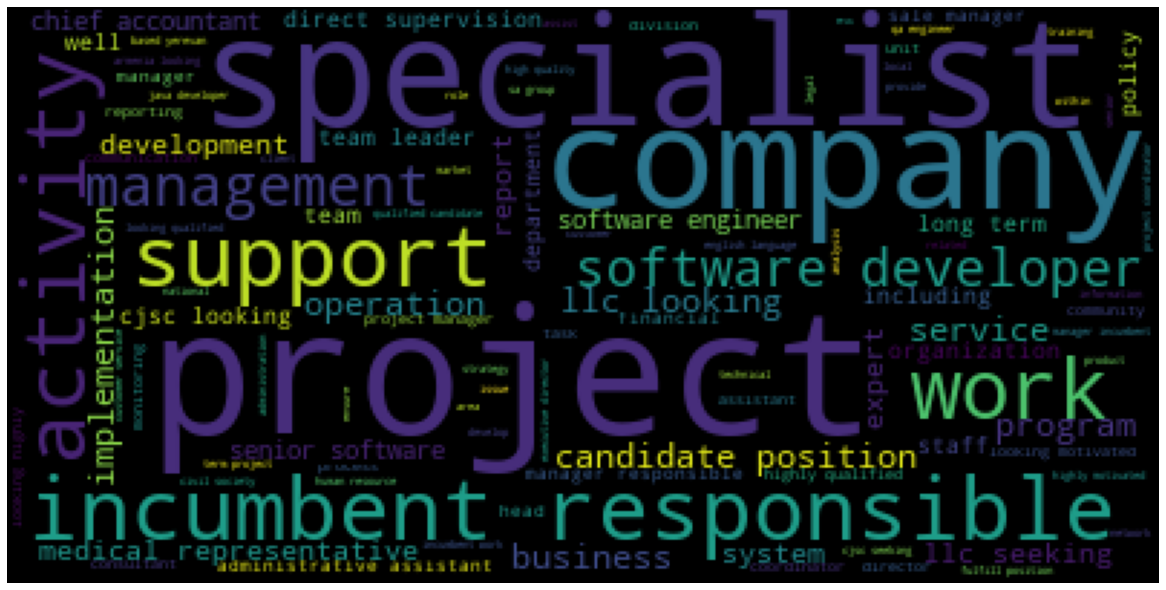

In [37]:
## Jobs in the year 2008 to 2011.
set2=df['2008':'2011']
cloud2=' '.join(set2['corpus_new'])

wordcloud=WordCloud(max_font_size=60).generate(cloud2)

plt.figure(figsize=(16,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [38]:
## Now again removing the unnescessay word

for word in ['report','program','community','staff','work','department','including', 'information','related','implementation',
             'support','cjsc looking','llc', 'looking','qualified', 'candidate','team','divison','policy','position',
              'activity','service','organization','responsible','communication','specialist','project','incumbent','company']:
    
    cloud2=cloud2.replace(word,'')



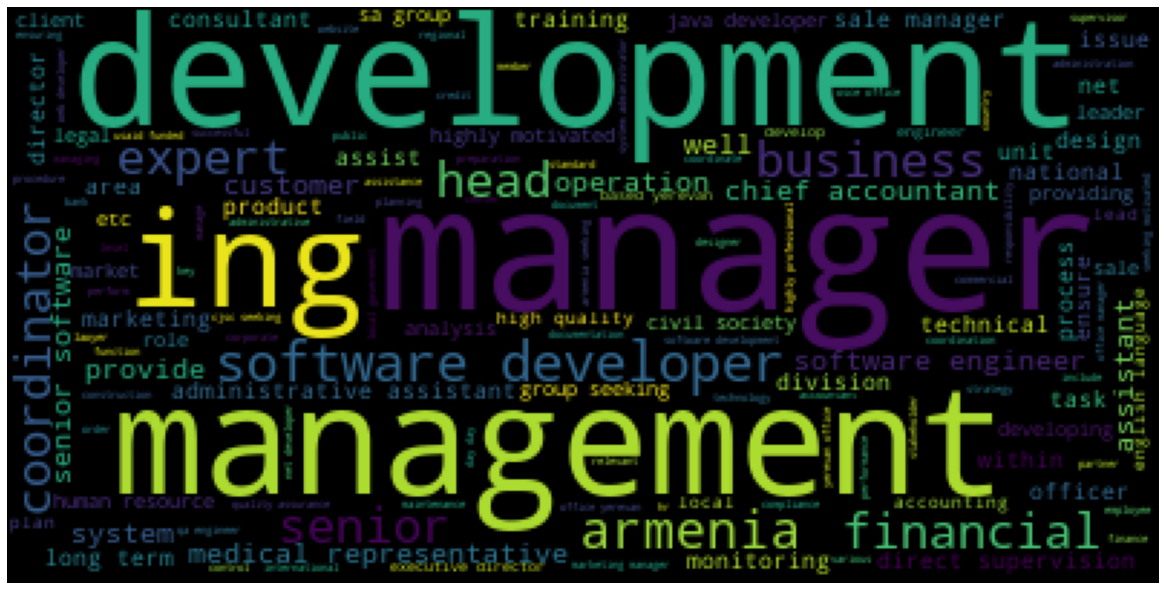

In [39]:
wordcloud=WordCloud(max_font_size=60).generate(cloud2)

plt.figure(figsize=(16,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

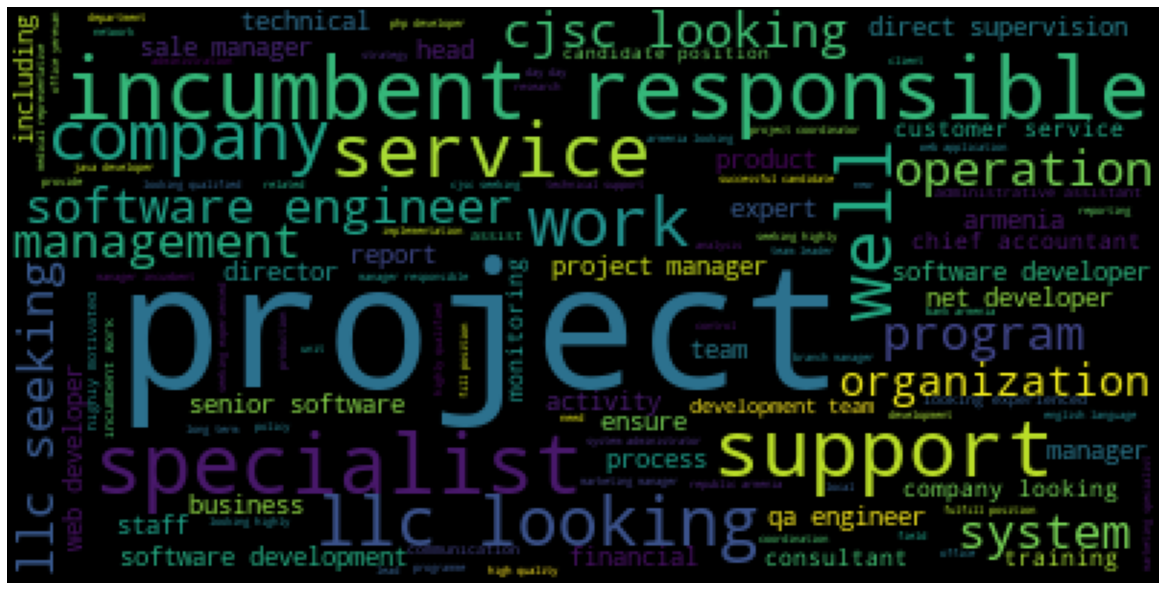

In [40]:
## Jobs in the year 2012:2015
set3=df['2012':'2015']
cloud3=' '.join(set3['corpus_new'])

wordcloud=WordCloud(max_font_size=60).generate(cloud3)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [41]:
for word in['organization','product','system','program','cjsc looking','management','manager','incumbent','support','report',
            'seeking','service','well','company','looking','work','including','staff','activity','responsible',
            'candidate', 'position','operation','fill', 'position','long', 'term','armenia','llc','looking','related sale']:
    cloud3=cloud3.replace(word,'')


In [42]:

wordcloud=WordCloud(max_font_size=60).generate(cloud3)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

### Objective 2: Desired Characteristics and Skill-sets:

In [43]:
job2=job[['JobDescription','RequiredQual']]

## Missing Imputation
def missing_imputation(x):
    x=x.fillna(' ')
    return x

job2=job2.apply(missing_imputation)

In [44]:
job2.isnull().sum()

JobDescription    0
RequiredQual      0
dtype: int64

In [45]:
df2=job2['JobDescription']+' '+ job2['RequiredQual']

In [46]:
## DATA PROCESSING
corpus2=[]
for i in range(0, len(df2)):
    job_clean2=re.sub(r'\W', ' ' ,str(df2[i]))
    job_clean2=job_clean2.lower()
    job_clean2=re.sub(r'^br$',' ',job_clean2)
    job_clean2=re.sub(r'\s+[a-z]\s+',' ',job_clean2)
    job_clean2=re.sub(r'^[a-z]\s+','',job_clean2)
    job_clean2=re.sub(r'[0-9]',' ',job_clean2)
    job_clean2=re.sub(r'\s+',' ',job_clean2)
    corpus2.append(job_clean2)

In [47]:
## Removing stopwords
for i in range(0, len(corpus2)):
    words=nltk.word_tokenize(corpus2[i])
    words=[word for word in words if word not in stop]
    corpus2[i]=' '.join(words)


In [48]:

# Lemmatization
for i in range(0, len(corpus2[i])):
    words=nltk.word_tokenize(corpus2[i])
    words=[wn.lemmatize(word) for word in words]
    corpus2[i]=' '.join(words)


In [49]:
corpus2[1]

'bachelor degree master preferred excellent skill spoken written english armenian language past english armenian translation armenian english translation experience good communication public speaking skill ability work independently part team remuneration commensurate experience'

In [50]:
# Now concatenating the time variable with corpus created above
C2=pd.concat([job.date, pd.DataFrame(corpus2)], axis=1)
C2.columns=['date','corpus2']

In [51]:
## Now converting the date variable into datetime
C2['date']=pd.to_datetime(C2['date'], errors='coerce')
C2.dtypes

date       datetime64[ns]
corpus2            object
dtype: object

In [52]:
C2=C2.set_index('date')

In [53]:
C2.index.year.value_counts()

2012.0    1965
2013.0    1834
2014.0    1811
2008.0    1599
2011.0    1567
2007.0    1383
2010.0    1381
2015.0    1194
2009.0    1091
2005.0    1044
2006.0    1032
2004.0     803
Name: date, dtype: int64

In [55]:
# Now we will divide the years above into 3 quarters to see the change in demand


d1=C2['2004':'2007']
d1.head()

corpus2
date                                                         
2004-01-05  ameria investment consulting company seeking c...
2004-01-07  bachelor degree master preferred excellent ski...
2004-01-07  public outreach strengthening growing network ...
2004-01-07  lead local enhancement development health bcc ...
2004-01-10  university degree economical background plus e...

In [56]:
cloud4=' '.join(d1['corpus2'])
cloud4

'ameria investment consulting company seeking chief financial officer position manages company fiscal administrative function provides highly responsible technically complex staff assistance executive director work performed requires high level technical proficiency financial management investment management well management supervisory administrative skill perform job successfully individual must able perform essential duty satisfactorily requirement listed representative knowledge skill ability required knowledge generally accepted accounting principle local accounting standard legislation state reporting requirement pertaining accounting principle practice financial management budgeting principle practice financial system design analysis principle practice contract management record management risk management principle practice management supervision principle practice information system management ability apply sound fiscal administrative practice company activity plan organize supe

In [58]:
wordcloud=WordCloud(max_font_size=60).generate(cloud4)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [59]:
for word in ['work','experience','knowledge','relevant','ability','good','excellent knowledge','least year',
              'skills','skills ability','work pressure','relevant field','work experience','ability work','least','year']:
    cloud4=cloud4.replace(word,' ')



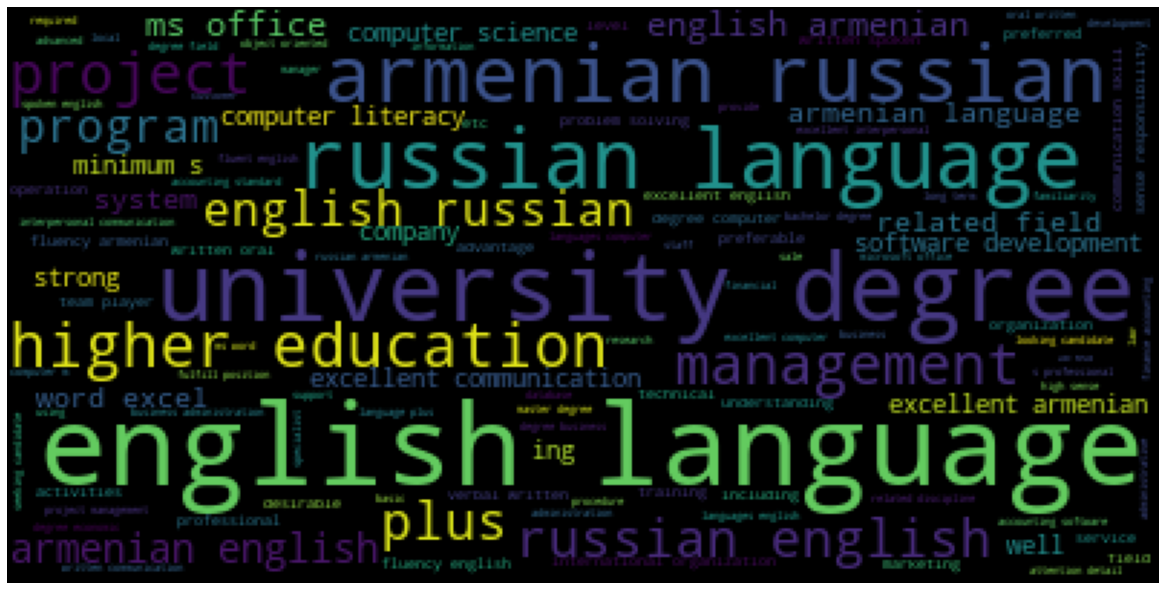

In [60]:
wordcloud=WordCloud(max_font_size=60).generate(cloud4)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [61]:
d2=C2['2008':'2011']
d2.head()

corpus2
date                                                         
2008-01-07                                                   
2008-01-07  higher education preferably marketing excellen...
2008-01-08  primary objective position produce required pr...
2008-01-07  firmplace corporation looking innovative graph...
2008-01-07  varnita ltd seeking scm engineer maintain deve...

In [62]:
cloud5=' '.join(d2['corpus2'])

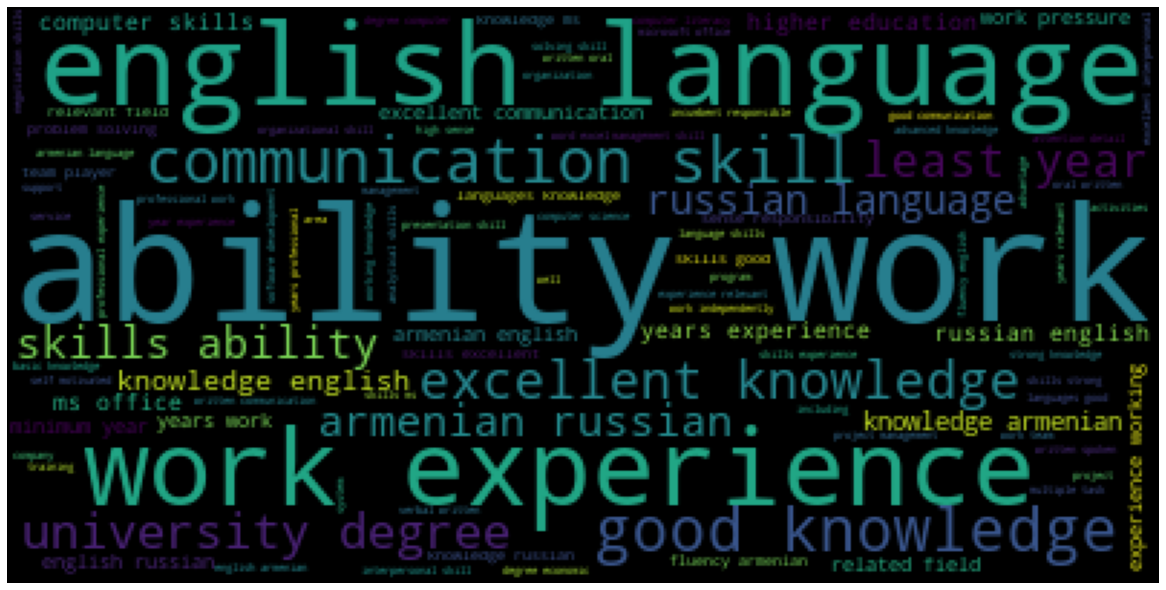

In [63]:
wordcloud=WordCloud(max_font_size=60).generate(cloud5)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)


In [64]:
X= ['skills ability','skills','ability','good knowledge','good','knowledge','ability work','work experience',
             'excellent knowledge','least year','work pressure','relevant field']
for i in X:
    cloud5=cloud5.replace(i," ")


In [65]:
wordcloud = WordCloud(max_font_size=60).generate(cloud5)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [66]:
d3=C2['2012':'2015']
d3.head()

corpus2
date                                                         
2012-01-09  university degree social science business admi...
2012-01-09  haypost cjsc seeking project managers operatio...
2012-01-09  university degree accounting finance economics...
2012-01-09  sas group llc seeking legal assistant carry en...
2012-01-09  sales department manager involved coordination...

In [67]:
cloud6 =' '.join(d3['corpus2'])

In [68]:
wordcloud = WordCloud(max_font_size=60).generate(cloud6)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [70]:
for word in ['ability work','ability','work','skills','skills ability','least year','excellent knowledge',
             'armenian','relevant field','good knowledge','russian','related field','english language','work experience',
             'years work','least','year']:
    cloud6=cloud6.replace(word,' ')


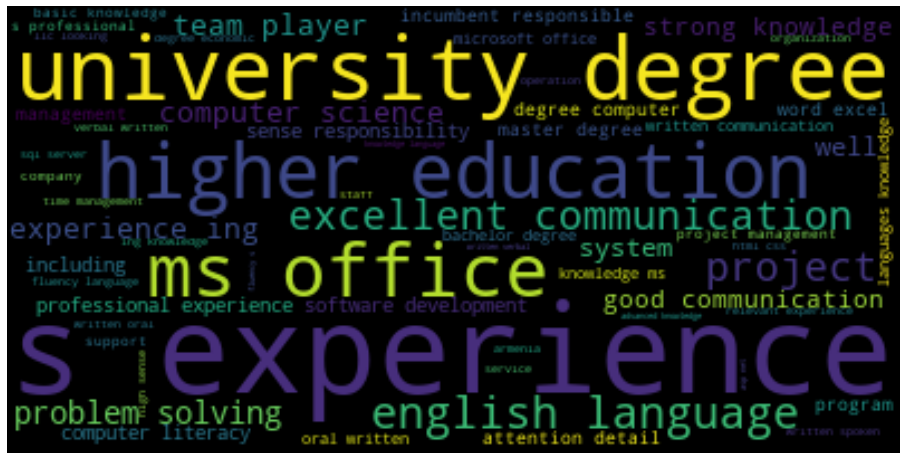

In [71]:
wordcloud = WordCloud(max_font_size=60).generate(cloud6)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### IT JOB CLASSIFICATION

In [72]:
## Build a classifier that can tell us from job description and company description whether a job is IT or not.

df3=job[['Title','Company','JobDescription','JobRequirment','RequiredQual']]
df3.head(2)

Title  \
0                            Chief Financial Officer   
1  Full-time Community Connections Intern (paid i...   

                                           Company  \
0             AMERIA Investment Consulting Company   
1  International Research & Exchanges Board (IREX)   

                                      JobDescription  \
0  AMERIA Investment Consulting Company is seekin...   
1                                                NaN   

                                       JobRequirment  \
0  - Supervises financial management and administ...   
1                                                NaN   

                                        RequiredQual  
0  To perform this job successfully, an\nindividu...  
1  - Bachelor's Degree; Master's is preferred;\n-...

In [73]:
df3.isnull().sum()

Title               28
Company              7
JobDescription    3892
JobRequirment     2522
RequiredQual       484
dtype: int64

In [74]:
## Missing Imputation
def missing_imputation(x):
    x=x.fillna(' ')
    return x

df3=df3.apply(missing_imputation)



In [75]:
df3.isnull().sum()

Title             0
Company           0
JobDescription    0
JobRequirment     0
RequiredQual      0
dtype: int64

In [76]:
## Now, concatenating all the columns
X=df3['Company']+ ' '+ df3['Title']+ ' '+ df3['JobDescription']+ ' '+ df3['JobRequirment']+' '+ df3['RequiredQual']

In [77]:
X.shape

(19001,)

In [78]:
X[1]

"International Research & Exchanges Board (IREX) Full-time Community Connections Intern (paid internship)     - Bachelor's Degree; Master's is preferred;\n- Excellent skills in spoken and written English and Armenian languages;\n- Past English to Armenian translation and Armenian to English\ntranslation experience;\n- Good communication and public speaking skills;\n- Ability to work independently and as part of a team.\nREMUNERATION:  Commensurate with experience."

In [79]:
y=job['IT']
y.shape

(19001,)

In [80]:
y=job['IT'].map({True:1, False:0})

In [81]:
## Now, Data processing of X variable
# Creating the corpus

corpus_IT = []
for i in range(0, len(X)):
    job_cleanIT= re.sub(r'\W', ' ', str(X[i])) #removing all special symbols except ' _ '
    job_cleanIT= job_cleanIT.lower()
    job_cleanIT= re.sub(r'^br$', ' ', job_cleanIT) 
    job_cleanIT= re.sub(r'\s+[a-z]\s+', ' ',job_cleanIT)
    job_cleanIT= re.sub(r'^[a-z]\s+', '', job_cleanIT)
    job_cleanIT=re.sub(r'[0-9]',' ',job_cleanIT)
    
    job_cleanIT= re.sub(r'\s+', ' ', job_cleanIT) #Removing extra spaces between words
    corpus_IT.append(job_cleanIT)

In [82]:
## Removing stopwords
from nltk.corpus import stopwords
for i in range(len(corpus_IT)):
    words = nltk.word_tokenize(corpus_IT[i])
    words = [word for word in words if word not in stop]
    corpus_IT[i] = ' '.join(words)

In [83]:
# Lemmatisation
for i in range(0, len(corpus2[i])):
    words=nltk.word_tokenize(corpus2[i])
    words=[wn.lemmatize(word) for word in words]
    corpus2[i]=' '.join(words)

In [84]:
## Creating the TF-IDF MODEL
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=2000)
X=vectorizer.fit_transform(corpus_IT).toarray()

In [85]:
X.shape

(19001, 2000)

In [86]:
y.shape

(19001,)

In [87]:
## Now splitting the data set into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

### Applying supervised models to classify whether job is IT or not
1.Naive Bayes

In [88]:
from sklearn.naive_bayes import MultinomialNB

In [89]:
nb=MultinomialNB()

In [90]:
nb.fit(X_train,y_train)


MultinomialNB()

In [91]:
y_pred=nb.predict(X_test)

In [92]:
from sklearn import metrics

## Accuracy of testing data
print(metrics.accuracy_score(y_test, y_pred))


0.9131807419100236


In [93]:
## Accuracy of training data
print(metrics.accuracy_score(y_train, nb.predict(X_train)))

0.9160526315789473


#### We can see that model has good accuracy

In [94]:
model=pd.DataFrame({'Actua':y_test,'Predicted':y_pred})
model.head()

Actua  Predicted
13813      0          0
4097       0          0
12527      1          1
16950      0          0
12544      1          1

In [95]:
## Confusion matrix
cm=metrics.confusion_matrix(y_test,y_pred)
cm

array([[2832,  211],
       [ 119,  639]], dtype=int64)

In [96]:
#Predicted the probablities
y_pred_prob = nb.predict_proba(X_test)[:,1]
y_pred_prob

array([1.45608266e-03, 3.39996557e-01, 9.99782406e-01, ...,
       1.27516019e-03, 4.03827264e-03, 9.11083012e-04])

In [97]:
## ROC AUC SCORE
metrics.roc_auc_score(y_test,y_pred_prob)

0.9531061816687288

#### 2.Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


In [99]:
## Accuracy of test data
print(metrics.accuracy_score(y_test, y_pred))

0.9400157853196527


In [100]:
## Accuracy of training data
print(metrics.accuracy_score(y_train, lr.predict(X_train)))

0.9498684210526316


In [101]:
## Dataframe of actual and predicted test data
model2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
model2.head()

Actual  Predicted
13813       0          0
4097        0          0
12527       1          1
16950       0          0
12544       1          1

In [102]:
## Confusion Matrix
cm2=metrics.confusion_matrix(y_test,y_pred)
cm2

array([[2973,   70],
       [ 158,  600]], dtype=int64)

In [103]:
## Predict probablities
y_pred_prob=lr.predict_proba(X_test)[:,1]
y_pred_prob

array([0.00580157, 0.21840662, 0.84509199, ..., 0.08388577, 0.00803368,
       0.01143577])

In [104]:
## ROC AUC SCORE
print(metrics.roc_auc_score(y_test,y_pred_prob))
0.9795664083059263

0.9795677089249344


0.9795664083059263

### Objective 4: Similarity of Jobs

In [105]:
## Given a job title find 5 top jobs that are of similar nature, based on job post

df5=job['Title']

#### - DATA PROCESSING

In [106]:
corpus_sim= []
for i in range(0, len(df5)):
    job_sim = re.sub(r'\W', ' ', str(df5[i])) #removing all special symbols except ' _ '
    job_sim = job_sim.lower()
    job_sim = re.sub(r'^br$', ' ', job_sim) 
    job_sim = re.sub(r'\s+[a-z]\s+', ' ',job_sim)
    job_sim = re.sub(r'^[a-z]\s+', '', job_sim )
    job_sim =re.sub(r'[0-9]',' ',job_sim)
    
    job_sim = re.sub(r'\s+', ' ', job_sim) #Removing extra spaces between words
    corpus_sim.append(job_sim)


In [107]:

## Removing stopwords

for i in range(len(corpus_sim)):
    words = nltk.word_tokenize(corpus_sim[i])
    words = [word for word in words if word not in stop]
    corpus_sim[i] = ' '.join(words)


In [108]:
# Creating the Tf-Idf Model

vectorizer = TfidfVectorizer(max_features = 2000)
X = vectorizer.fit_transform(corpus_sim).toarray()

In [109]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [110]:
X.shape

(19001, 2000)

In [111]:
from sklearn.neighbors import NearestNeighbors

In [112]:
#Let us take a job title for which we have to obtain simmilar jobs or neighbors

job_title=['cheif accountant']

Y=vectorizer.transform(job_title).toarray()

In [113]:
Y

array([[0., 0., 0., ..., 0., 0., 0.]])

In [114]:
## showing 5 similar jobs 
neigh= NearestNeighbors(n_neighbors=5, n_jobs=-1)
neigh.fit(X)

NearestNeighbors(n_jobs=-1)

In [115]:
## These are 5 similar jobs matching our given job-title.They are TF-Idf values.
i,j=neigh.kneighbors(Y)
print(i)

[[0. 1. 1. 1. 1.]]


In [116]:
print(j)

[[  242 15474 16125 18390 18566]]


In [117]:
### Converting into 2-D array

TWO_D= np.array([i,j])
TWO_D

array([[[0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]],

       [[2.4200e+02, 1.5474e+04, 1.6125e+04, 1.8390e+04, 1.8566e+04]]])

In [118]:
# inverse transforming the TF-IDF values to get the meaningful data
vectorizer.inverse_transform(TWO_D)

[array(['abap', 'abovyan', 'academy', 'acca'], dtype='<U18'),
 array(['aa', 'abap', 'abovyan', 'academy', 'acca'], dtype='<U18')]